# <span style="color: red">Predicting article retweets and likes based on title using ML</span>

**<span style="color: Green">Aim</span>**  
Predicting the number of ***retweets*** and ***like*** on Twitter from FreeCodeCamp's articles based on its titles.

**<span style="color: Green">Evaluation Metrics</span>**  
***Accuracy*** is used as the evaluation metric. 
Accuracy => Ratio of the number of correct predictions to the total number of predictions made.  
`Accuracy = Number of correct predictions/Total number of predictions made`

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data = pd.read_json('./dataset/dataset-tweets-final.json')
data.head()

,id,retweet_count,favorite_count,text,created_at,url,medium_claps,medium_categories
0,1026876138969333800,5,10,How to use JSON padding (and other options) to...,2018-08-07 17:02:04,https://medium.freecodecamp.org/use-jsonp-and-...,177,"[JavaScript, HTML, Web Development, Tutorial, ..."
1,1026831326425505800,7,19,How to build GitHub search functionality in Re...,2018-08-07 14:04:00,https://medium.freecodecamp.org/how-to-build-a...,61,"[React, Tech, Functional Programming, Programm..."
2,1026815727163064300,6,11,How to read and write Mindful Minutes from iOS...,2018-08-07 13:02:01,https://medium.freecodecamp.org/read-write-min...,54,"[iOS, Software Development, Programming, Web D..."
3,1026800632559280100,9,39,"How to make more money on Upwork, by @jpmorris",2018-08-07 12:02:02,https://medium.freecodecamp.org/7-steps-to-mak...,139,"[Freelancing, Tech, Web Development, Web Desig..."
4,1026770178430955500,14,62,Let's build a fun little game: Learn advanced ...,2018-08-07 10:01:01,https://medium.freecodecamp.org/learn-advanced...,342,"[CSS, Games, Tech, Programming, React]"


In [4]:
for el in data.columns:
    print(el)

id
retweet_count
favorite_count
text
created_at
url
medium_claps
medium_categories


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717 entries, 0 to 716
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 717 non-null    int64         
 1   retweet_count      717 non-null    int64         
 2   favorite_count     717 non-null    int64         
 3   text               717 non-null    object        
 4   created_at         717 non-null    datetime64[ns]
 5   url                717 non-null    object        
 6   medium_claps       717 non-null    int64         
 7   medium_categories  717 non-null    object        
dtypes: datetime64[ns](1), int64(4), object(3)
memory usage: 44.9+ KB


# Data Cleaning

In [6]:
df = data.drop(['id', 'created_at', 'url'], axis='columns')

In [7]:
df.head()

,retweet_count,favorite_count,text,medium_claps,medium_categories
0,5,10,How to use JSON padding (and other options) to...,177,"[JavaScript, HTML, Web Development, Tutorial, ..."
1,7,19,How to build GitHub search functionality in Re...,61,"[React, Tech, Functional Programming, Programm..."
2,6,11,How to read and write Mindful Minutes from iOS...,54,"[iOS, Software Development, Programming, Web D..."
3,9,39,"How to make more money on Upwork, by @jpmorris",139,"[Freelancing, Tech, Web Development, Web Desig..."
4,14,62,Let's build a fun little game: Learn advanced ...,342,"[CSS, Games, Tech, Programming, React]"


In [8]:
df.shape

(717, 5)

In [9]:
df.drop_duplicates(['text'], inplace=True)

In [10]:
df.shape

(714, 5)

In [11]:
import re


def clean_text(text):
    text = text.map(lambda x: re.sub(r'\\x[00-ff]{2}', '', str(x)))
    text = text.str.strip()
    text = text.map(lambda x: re.sub('b"', '', str(x)))
    return text

In [12]:
df['text'] = clean_text(df['text'])

In [13]:
df.head()

,retweet_count,favorite_count,text,medium_claps,medium_categories
0,5,10,How to use JSON padding (and other options) to...,177,"[JavaScript, HTML, Web Development, Tutorial, ..."
1,7,19,How to build GitHub search functionality in Re...,61,"[React, Tech, Functional Programming, Programm..."
2,6,11,How to read and write Mindful Minutes from iOS...,54,"[iOS, Software Development, Programming, Web D..."
3,9,39,"How to make more money on Upwork, by @jpmorris",139,"[Freelancing, Tech, Web Development, Web Desig..."
4,14,62,Let's build a fun little game: Learn advanced ...,342,"[CSS, Games, Tech, Programming, React]"


In [14]:
from string import punctuation

def removePunctuations(text):
    newText = "".join([i for i in text if i not in punctuation])
    return newText

df['noPunctuations'] = df['text'].apply(lambda x:removePunctuations(x).lower())

In [15]:
from nltk.corpus import stopwords

def removeStopwords(text):
    newtext = [i for i in text.split() if i not in stopwords.words("english")]
    return newtext

df['noStopwordsTokenized'] = df['noPunctuations'].apply(lambda x:removeStopwords(x))

In [16]:
from nltk.stem import WordNetLemmatizer

wnl = WordNetLemmatizer()

def lemmatize(text):
    newText = [wnl.lemmatize(ele) for ele in text]
    return newText

df['lemmatized'] = df['noStopwordsTokenized'].apply(lambda x:lemmatize(x))

In [17]:
df.head()

,retweet_count,favorite_count,text,medium_claps,medium_categories,noPunctuations,noStopwordsTokenized,lemmatized
0,5,10,How to use JSON padding (and other options) to...,177,"[JavaScript, HTML, Web Development, Tutorial, ...",how to use json padding and other options to b...,"[use, json, padding, options, bypass, origin, ...","[use, json, padding, option, bypass, origin, p..."
1,7,19,How to build GitHub search functionality in Re...,61,"[React, Tech, Functional Programming, Programm...",how to build github search functionality in re...,"[build, github, search, functionality, react, ...","[build, github, search, functionality, react, ..."
2,6,11,How to read and write Mindful Minutes from iOS...,54,"[iOS, Software Development, Programming, Web D...",how to read and write mindful minutes from ios...,"[read, write, mindful, minutes, ioss, healthki...","[read, write, mindful, minute, io, healthkit, ..."
3,9,39,"How to make more money on Upwork, by @jpmorris",139,"[Freelancing, Tech, Web Development, Web Desig...",how to make more money on upwork by jpmorris,"[make, money, upwork, jpmorris]","[make, money, upwork, jpmorris]"
4,14,62,Let's build a fun little game: Learn advanced ...,342,"[CSS, Games, Tech, Programming, React]",lets build a fun little game learn advanced re...,"[lets, build, fun, little, game, learn, advanc...","[let, build, fun, little, game, learn, advance..."


## Finalizing the cleaned Data

In [18]:
def finalize(textList):
    text = " ".join(textList)
    return text

df['text_cleaned'] = df['lemmatized'].apply(lambda x:finalize(x))
df.head()

,retweet_count,favorite_count,text,medium_claps,medium_categories,noPunctuations,noStopwordsTokenized,lemmatized,text_cleaned
0,5,10,How to use JSON padding (and other options) to...,177,"[JavaScript, HTML, Web Development, Tutorial, ...",how to use json padding and other options to b...,"[use, json, padding, options, bypass, origin, ...","[use, json, padding, option, bypass, origin, p...",use json padding option bypass origin policy
1,7,19,How to build GitHub search functionality in Re...,61,"[React, Tech, Functional Programming, Programm...",how to build github search functionality in re...,"[build, github, search, functionality, react, ...","[build, github, search, functionality, react, ...",build github search functionality react rxjs 6...
2,6,11,How to read and write Mindful Minutes from iOS...,54,"[iOS, Software Development, Programming, Web D...",how to read and write mindful minutes from ios...,"[read, write, mindful, minutes, ioss, healthki...","[read, write, mindful, minute, io, healthkit, ...",read write mindful minute io healthkit swift b...
3,9,39,"How to make more money on Upwork, by @jpmorris",139,"[Freelancing, Tech, Web Development, Web Desig...",how to make more money on upwork by jpmorris,"[make, money, upwork, jpmorris]","[make, money, upwork, jpmorris]",make money upwork jpmorris
4,14,62,Let's build a fun little game: Learn advanced ...,342,"[CSS, Games, Tech, Programming, React]",lets build a fun little game learn advanced re...,"[lets, build, fun, little, game, learn, advanc...","[let, build, fun, little, game, learn, advance...",let build fun little game learn advanced react...


In [19]:
df['text_length'] = df['text_cleaned'].str.len()

In [20]:
df['text'] = df['text_cleaned']

In [21]:
df.head()

,retweet_count,favorite_count,text,medium_claps,medium_categories,noPunctuations,noStopwordsTokenized,lemmatized,text_cleaned,text_length
0,5,10,use json padding option bypass origin policy,177,"[JavaScript, HTML, Web Development, Tutorial, ...",how to use json padding and other options to b...,"[use, json, padding, options, bypass, origin, ...","[use, json, padding, option, bypass, origin, p...",use json padding option bypass origin policy,44
1,7,19,build github search functionality react rxjs 6...,61,"[React, Tech, Functional Programming, Programm...",how to build github search functionality in re...,"[build, github, search, functionality, react, ...","[build, github, search, functionality, react, ...",build github search functionality react rxjs 6...,66
2,6,11,read write mindful minute io healthkit swift b...,54,"[iOS, Software Development, Programming, Web D...",how to read and write mindful minutes from ios...,"[read, write, mindful, minutes, ioss, healthki...","[read, write, mindful, minute, io, healthkit, ...",read write mindful minute io healthkit swift b...,52
3,9,39,make money upwork jpmorris,139,"[Freelancing, Tech, Web Development, Web Desig...",how to make more money on upwork by jpmorris,"[make, money, upwork, jpmorris]","[make, money, upwork, jpmorris]",make money upwork jpmorris,26
4,14,62,let build fun little game learn advanced react...,342,"[CSS, Games, Tech, Programming, React]",lets build a fun little game learn advanced re...,"[lets, build, fun, little, game, learn, advanc...","[let, build, fun, little, game, learn, advance...",let build fun little game learn advanced react...,95


In [22]:
df.drop(['noPunctuations', 'noStopwordsTokenized', 'lemmatized', 'text_cleaned'], inplace=True, axis=1)

In [23]:
df.head()

,retweet_count,favorite_count,text,medium_claps,medium_categories,text_length
0,5,10,use json padding option bypass origin policy,177,"[JavaScript, HTML, Web Development, Tutorial, ...",44
1,7,19,build github search functionality react rxjs 6...,61,"[React, Tech, Functional Programming, Programm...",66
2,6,11,read write mindful minute io healthkit swift b...,54,"[iOS, Software Development, Programming, Web D...",52
3,9,39,make money upwork jpmorris,139,"[Freelancing, Tech, Web Development, Web Desig...",26
4,14,62,let build fun little game learn advanced react...,342,"[CSS, Games, Tech, Programming, React]",95


In [24]:
df = df[df.columns[[2, 1, 0, 3, 5, 4]]]

In [25]:
df.head()

,text,favorite_count,retweet_count,medium_claps,text_length,medium_categories
0,use json padding option bypass origin policy,10,5,177,44,"[JavaScript, HTML, Web Development, Tutorial, ..."
1,build github search functionality react rxjs 6...,19,7,61,66,"[React, Tech, Functional Programming, Programm..."
2,read write mindful minute io healthkit swift b...,11,6,54,52,"[iOS, Software Development, Programming, Web D..."
3,make money upwork jpmorris,39,9,139,26,"[Freelancing, Tech, Web Development, Web Desig..."
4,let build fun little game learn advanced react...,62,14,342,95,"[CSS, Games, Tech, Programming, React]"


# EDA

## General steps

In [26]:
df.describe()

,favorite_count,retweet_count,medium_claps,text_length
count,714.000000,714.000000,714.000000,714.000000
mean,49.347339,16.469188,284.721289,53.613445
std,45.238403,15.695195,273.363424,15.092483
min,0.000000,0.000000,1.000000,14.000000
25%,20.000000,7.000000,7.000000,42.000000
50%,34.000000,11.000000,238.000000,53.000000
75%,63.750000,20.000000,469.750000,65.000000
max,298.000000,125.000000,997.000000,95.000000


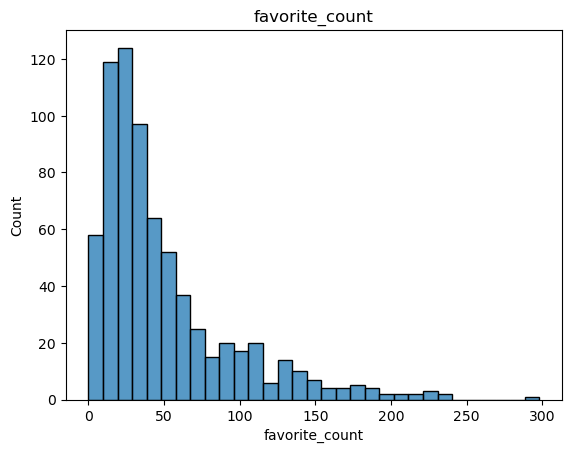

Total favorite_count = 35234


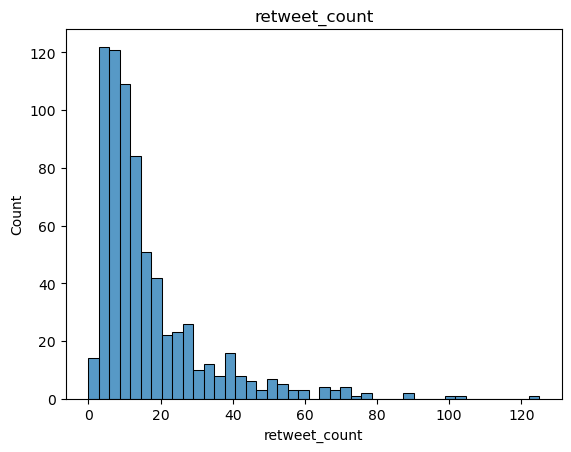

Total retweet_count = 11759


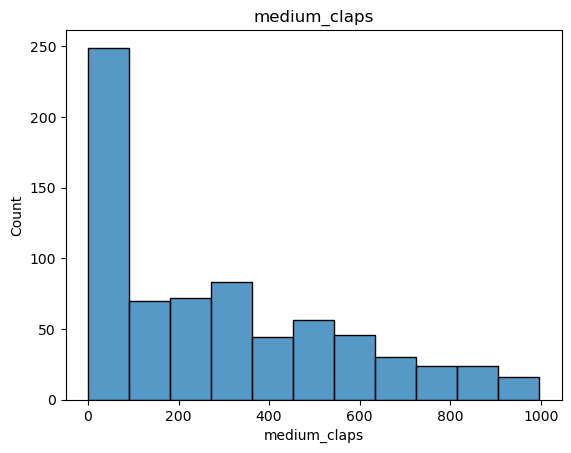

Total medium_claps = 203291


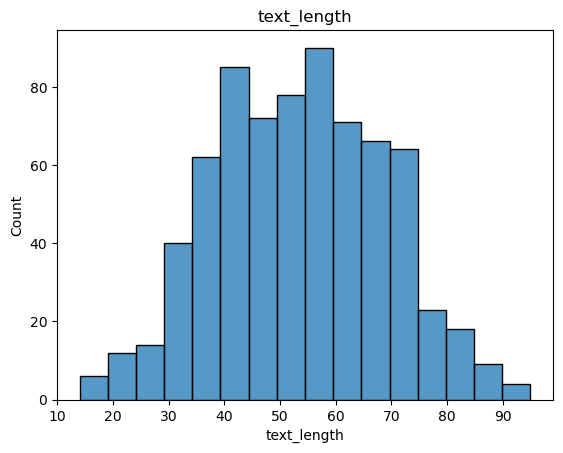

In [27]:
for el in df.describe().columns:
    sns.histplot(df[el])
    plt.title(el)
    plt.show()
    if(el != 'text_length'):
        print(f'Total {el} = {df[el].sum()}')

From the above histograms we get to know that:
  - `text_length` -> Gaussian distribution
  - `favorite_count` -> positive skewness present
  - `retweet_count ` -> positive skewness present
  - `medium_claps ` -> positive skewness present

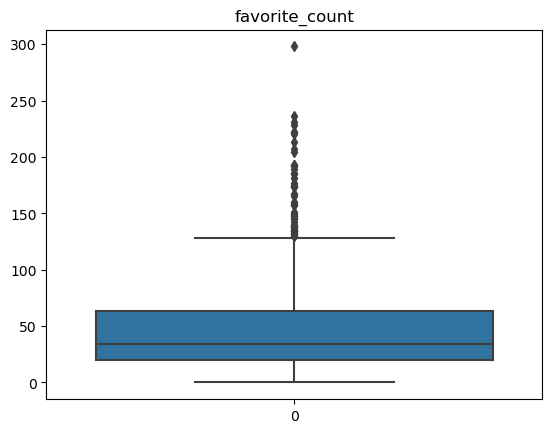

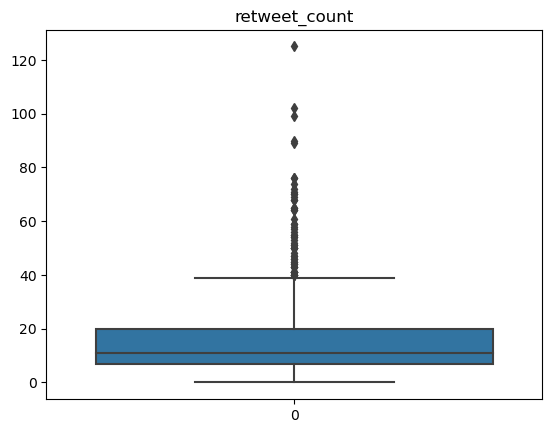

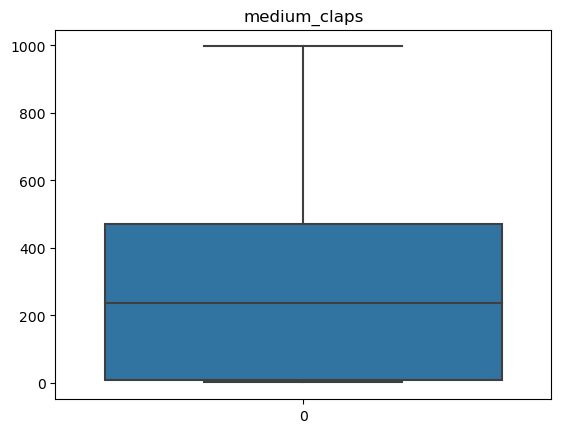

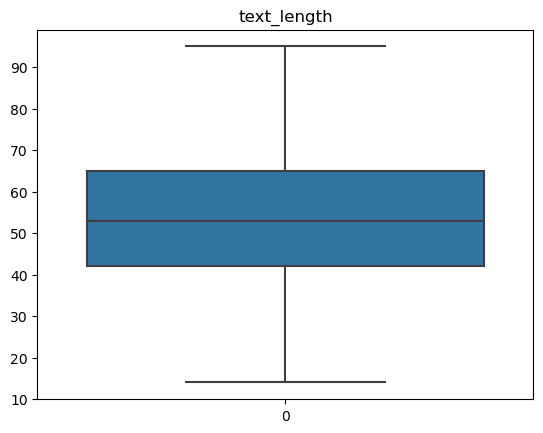

In [28]:
for el in df.describe().columns:
    sns.boxplot(df[el])
    plt.title(el)
    plt.show()

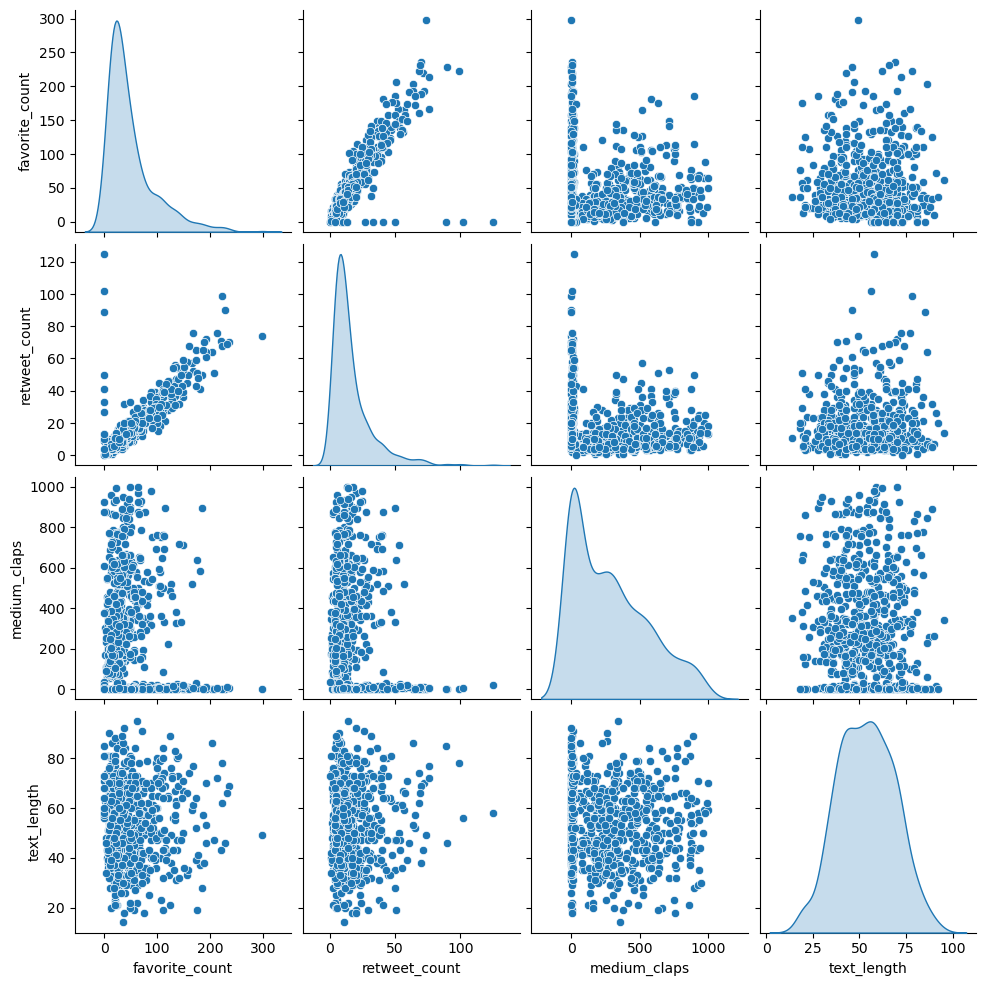

In [29]:
sns.pairplot(df, diag_kind='kde')

There is a direct relationship (increasing) between `retweet_count` and `favourite_count`.  
More `retweet_count` more `favuorite_count` and vice-versa.

## **Outlier Removal**

In [30]:
for el in df.describe().columns:
    Q1 = df[el].quantile(0.25)
    Q3 = df[el].quantile(0.75)
    IQR = Q3 - Q1
    df = df.loc[(df[el] >= Q1 - 1.5 * IQR) & (df[el] <= Q3 + 1.5 * IQR)]

In [31]:
df.shape

(630, 6)

## Finding relationship

**Now, we need to find out the relationship of `['favorite_count', 'retweet_count', 'medium_claps']` with `['text', 'text_length', 'medium_categories']`**

- Analyse the the counts with the `text_length` => the _range_ of `text_length` showing a good amount of `['favorite_count', 'retweet_count', 'medium_claps']`

In [32]:
df.columns

Index(['text', 'favorite_count', 'retweet_count', 'medium_claps',
       'text_length', 'medium_categories'],
      dtype='object')

In [33]:
grp_data = df.groupby(pd.cut(df['text_length'], bins=range(0, df['text_length'].max() + 10, 10)))

sums = grp_data[['retweet_count', 'medium_claps', 'favorite_count']].sum()

In [34]:
sums

,retweet_count,medium_claps,favorite_count
text_length,,,
"(0, 10]",0,0,0
"(10, 20]",120,2621,392
"(20, 30]",300,8454,936
"(30, 40]",1163,27217,3692
"(40, 50]",1609,46818,5196
"(50, 60]",1755,46992,5370
"(60, 70]",1477,34393,4714
"(70, 80]",796,16210,2450
"(80, 90]",170,6706,534


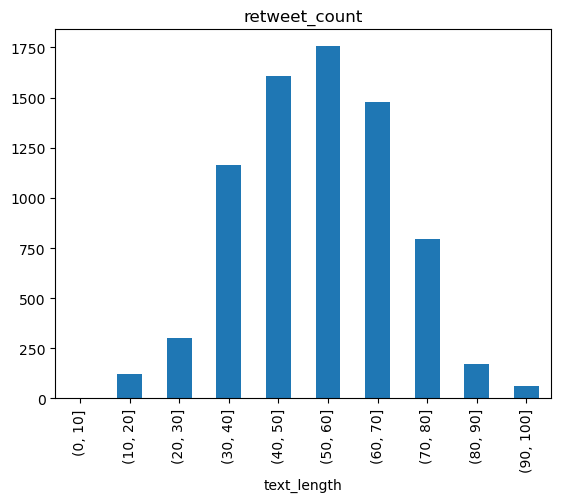

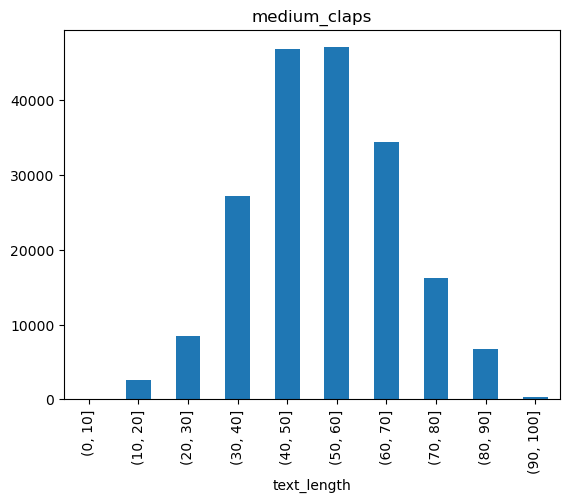

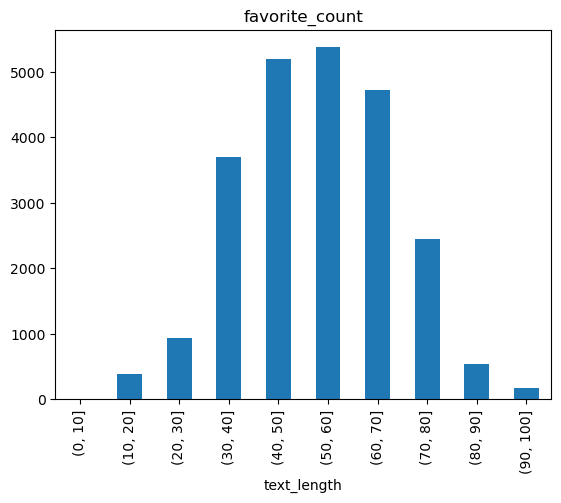

In [35]:
for el in sums.columns:
    sums[el].plot(kind='bar')
    plt.title(el)
    plt.show()

- Analyse the the counts with the `text` => presence of _which words_ and _the number of words_ in `text` is showing a good amount of `['favorite_count', 'retweet_count', 'medium_claps']`

In [40]:
grp_data = df.groupby(pd.cut(df['text'].apply(lambda x:len(x.split())), bins=range(0, (df['text'].apply(lambda x:len(x.split()))).max() + 10, 10)))

sums = grp_data[['retweet_count', 'medium_claps', 'favorite_count']].sum()

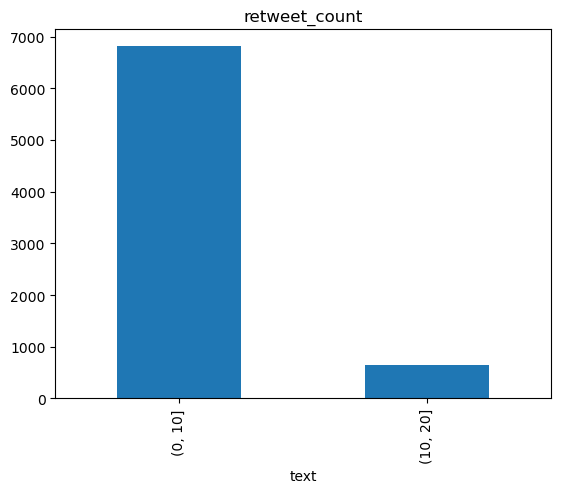

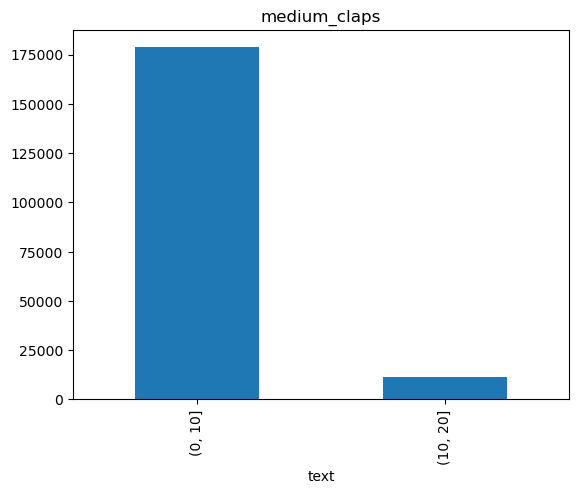

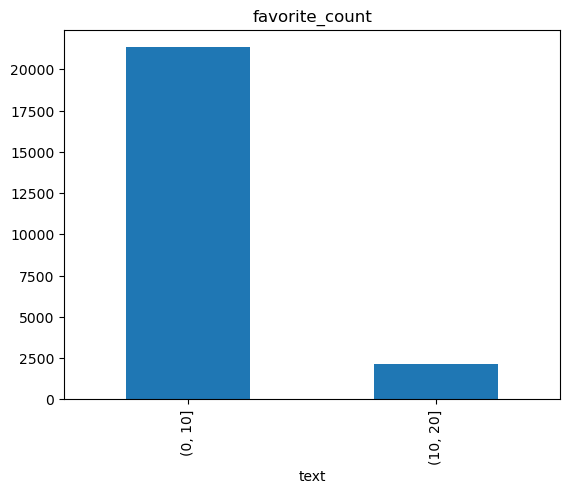

In [41]:
for el in sums.columns:
    sums[el].plot(kind='bar')
    plt.title(el)
    plt.show()

- Analyse the the counts with the `medium_categories` =>  _which category_ in `medium_categories` is showing a good amount of `['favorite_count', 'retweet_count', 'medium_claps']`